<a href="https://colab.research.google.com/github/iAmirHosein92/Class_Exercise_Solution/blob/main/SantanderCustomerTransactionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# ***Read, Check Data***

In [2]:
df = pd.read_csv('./drive/MyDrive/train.csv')
df_test = pd.read_csv('./drive/MyDrive/test.csv')

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
df['target'].value_counts()

,count
target,
0,179902
1,20098


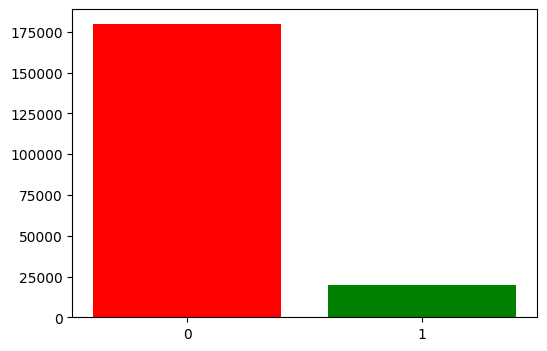

In [4]:
plt.figure(figsize=(6,4))
plt.bar(height=df['target'].value_counts(), x=df['target'].value_counts().index, color=['red', 'green'])
plt.xticks(ticks=df['target'].value_counts().index, labels=['0', '1'])
plt.show()
#this plot shows imbalancing in this dataset

In [3]:
df.isna().sum()

,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


# ***Predcitions***

In [62]:
ppn = Perceptron(random_state=42)
svc = SVC(random_state=42)
log_reg = LogisticRegression(random_state=42)
std_scl = StandardScaler()
pca = PCA(n_components=10)

In [63]:
target = df['target']
features = df.drop(['target', 'ID_code'], axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=42, stratify=target)

In [65]:
X_train_scaled = std_scl.fit_transform(X_train)
X_test_scaled = std_scl.transform(X_test)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [66]:
from pprint import pprint
def report(model,x, y_true):
    y_pred = model.predict(x)
    report = {
        'model':model.__class__.__name__,
        'accuracy':accuracy_score(y_pred, y_true),
        'precision':precision_score(y_pred, y_true),
        'recall':recall_score(y_pred, y_true),
        'f1':f1_score(y_pred, y_true),
        'auc':roc_auc_score(y_pred, y_true)
    }

    pprint(report, sort_dicts=False)
    return 'Done!\n'


# *With Imbalanced Dataset:*

In [67]:
ppn.fit(X_train_pca, y_train)
print(f'ppn score:', report(ppn, X_test_pca, y_test))
log_reg.fit(X_train_pca, y_train)
print(f'log_reg score:', report(log_reg, X_test_pca, y_test))
svc.fit(X_train_pca, y_train)
print('SVC score:',report(svc, X_test_pca, y_test))

{'model': 'Perceptron',
 'accuracy': 0.85555,
 'precision': 0.41748216951401557,
 'recall': 0.32807612095933264,
 'f1': 0.3674184366104664,
 'auc': 0.6304805004735511}
ppn score: Done!

{'model': 'LogisticRegression',
 'accuracy': 0.9130333333333334,
 'precision': 0.24896334383811577,
 'recall': 0.6850753080785029,
 'f1': 0.3652068126520681,
 'auc': 0.8033742019816134}
log_reg score: Done!

{'model': 'SVC',
 'accuracy': 0.9105833333333333,
 'precision': 0.16851882567589982,
 'recall': 0.7426900584795322,
 'f1': 0.27470596187643637,
 'auc': 0.8285953362393568}
SVC score: Done!



# *Balanced With (SMOTE,  ADASYN)*

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_pca, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 125931, 1: 14069})
After Counter({0: 125931, 1: 125931})


In [14]:
ppn.fit(X_train_sm, y_train_sm)
print(f'ppn score:', report(ppn, X_test_pca, y_test))
log_reg.fit(X_train_sm, y_train_sm)
print(f'log_reg score:', report(log_reg, X_test_pca, y_test))
# svc.fit(X_train_sm, y_train_sm)
# print('SVC score:',report(svc, X_test_pca, y_test))

{'model': 'Perceptron',
 'accuracy': 0.7096333333333333,
 'precision': 0.8225244650854204,
 'recall': 0.23269672938857866,
 'f1': 0.36276517922457935,
 'auc': 0.6025201447868221}
ppn score: Done!

{'model': 'LogisticRegression',
 'accuracy': 0.7797333333333333,
 'precision': 0.7704428595123569,
 'recall': 0.2819081143412029,
 'f1': 0.4127788145383453,
 'auc': 0.6250544178994114}
log_reg score: Done!



In [15]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Counting the number of instances in each class before oversampling
counter = Counter(y_train)
print('Before', counter)

# Oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train_pca, y_train)

# Counting the number of instances in each class after oversampling
counter = Counter(y_train_ada)
print('After', counter)

Before Counter({0: 125931, 1: 14069})
After Counter({1: 127024, 0: 125931})


In [16]:
ppn.fit(X_train_ada, y_train_ada)
print(f'ppn score:', report(ppn, X_test_pca, y_test))
log_reg.fit(X_train_ada, y_train_ada)
print(f'log_reg score:', report(log_reg, X_test_pca, y_test))
# svc.fit(X_train_ada, y_train_ada)
# print('SVC score:',report(svc, X_test_pca, y_test))

{'model': 'Perceptron',
 'accuracy': 0.5824666666666667,
 'precision': 0.8527118925194891,
 'recall': 0.17543081385429107,
 'f1': 0.2909945095375559,
 'auc': 0.5732505103641874}
ppn score: Done!

{'model': 'LogisticRegression',
 'accuracy': 0.7381833333333333,
 'precision': 0.8158898656493614,
 'recall': 0.25202377292755407,
 'f1': 0.385094140212158,
 'auc': 0.6123020895169858}
log_reg score: Done!



# ***Predict Test DataSet***

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [68]:
test_scaled = std_scl.transform(df_test.drop('ID_code', axis=1))
test_pca = pca.transform(test_scaled)

In [69]:
ppn_pred = ppn.predict(test_pca)
log_reg_pred = log_reg.predict(test_pca)
svc_pred = svc.predict(test_pca)

In [70]:
ppn_pred = pd.Series(ppn_pred)
log_reg_pred = pd.Series(log_reg_pred)
svc_pred = pd.Series(svc_pred)

In [71]:
svc_pred.value_counts()

,count
0,196812
1,3188


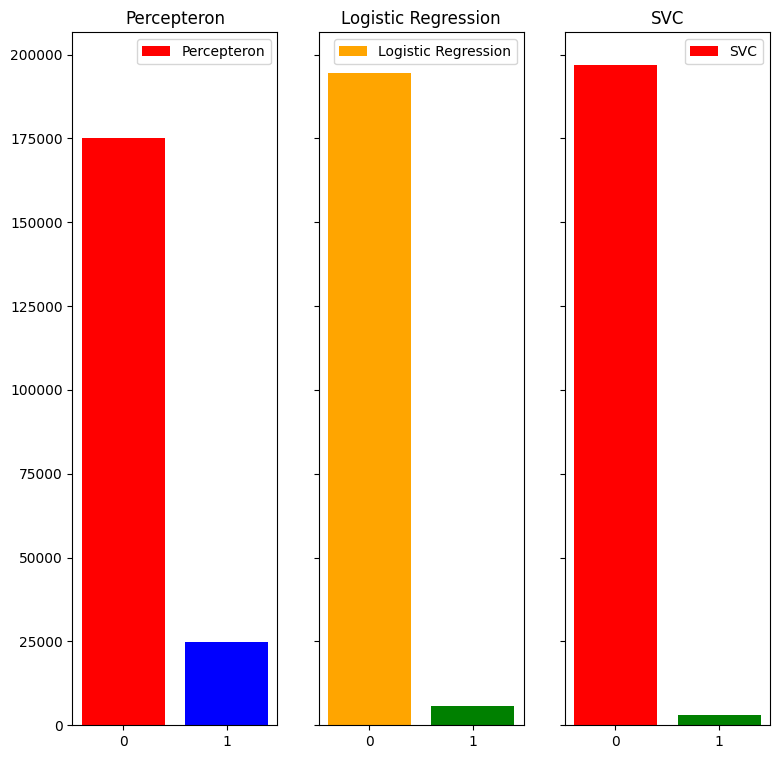

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(9, 9),sharex=True, sharey=True)
axs[0].bar(height=ppn_pred.value_counts(), x=ppn_pred.value_counts().index, color=['red', 'blue'], label='Percepteron')
axs[1].bar(height=log_reg_pred.value_counts(), x=log_reg_pred.value_counts().index, color=['orange', 'green'], label='Logistic Regression')
axs[2].bar(height=svc_pred.value_counts(), x=svc_pred.value_counts().index, color=['red', 'green'], label='SVC')
axs[0].set_title('Percepteron')
axs[1].set_title('Logistic Regression')
axs[2].set_title('SVC')
axs[0].set_xticks(ticks=ppn_pred.value_counts().index, labels=['0', '1'])
axs[1].set_xticks(ticks=log_reg_pred.value_counts().index, labels=['0', '1'])
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

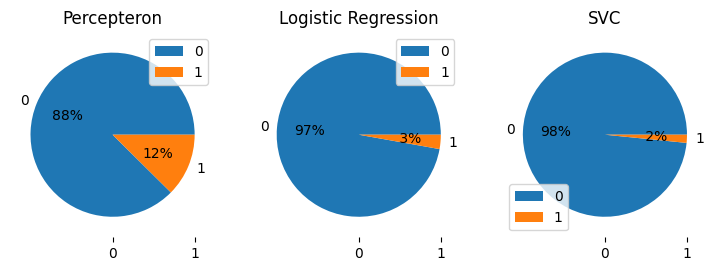

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(9, 9),sharex=True, sharey=True)
axs[0].pie(ppn_pred.value_counts(), labels=ppn_pred.value_counts().index, autopct='%2.0f%%')
axs[1].pie(log_reg_pred.value_counts(), labels=log_reg_pred.value_counts().index, autopct='%2.0f%%')
axs[2].pie(svc_pred.value_counts(), labels=svc_pred.value_counts().index, autopct='%2.0f%%')
axs[0].set_title('Percepteron')
axs[1].set_title('Logistic Regression')
axs[2].set_title('SVC')
axs[0].set_xticks(ticks=ppn_pred.value_counts().index, labels=['0', '1'])
axs[1].set_xticks(ticks=log_reg_pred.value_counts().index, labels=['0', '1'])
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()